<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/%D0%BF%D0%BE%D0%B4%D0%B1%D0%BE%D1%80%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D1%82%D0%B5%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import warnings
import ruptures as rpt
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


import pandas as pd

# Подавление предупреждений о сходимости
warnings.filterwarnings("ignore")


drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# path_csv_red = '/content/drive/MyDrive/Colab Notebooks/zvezda/Server_zvezda/Dataset/series_data.csv'
end_train = '2023-12-24 23:59:59'
path_csv_red = '/content/drive/MyDrive/Colab Notebooks/zvezda/Server_zvezda/Dataset/ts2024.csv'


# Читаем данные из CSV файла в DataFrame
df = pd.read_csv(path_csv_red)

# Преобразуем один из столбцов DataFrame в pd.Series
series_data = df['SALES VOL']  # Замените 'column_name' на имя столбца, содержащего данные
date_idx = pd.date_range(start='2022-01-01', periods=56,freq='2W-SUN')
series_data.index = date_idx
series_data_org = series_data.copy()
series_data = series_data[:end_train].copy()
result = rpt.Window(model="rbf",width=26).fit_predict(series_data.values,pen=1.37)

In [4]:
concat_df_new = pd.concat([series_data[result[0] + (len(series_data)//2) - result[0]:result[0]+series_data[:result[0]].shape[0] +(len(series_data)//2) - result[0]],
                       series_data[result[0]:]],
                       ignore_index=True
                       )
concat_df_new.index = series_data.index

(0.0, 0.0, 0.0)


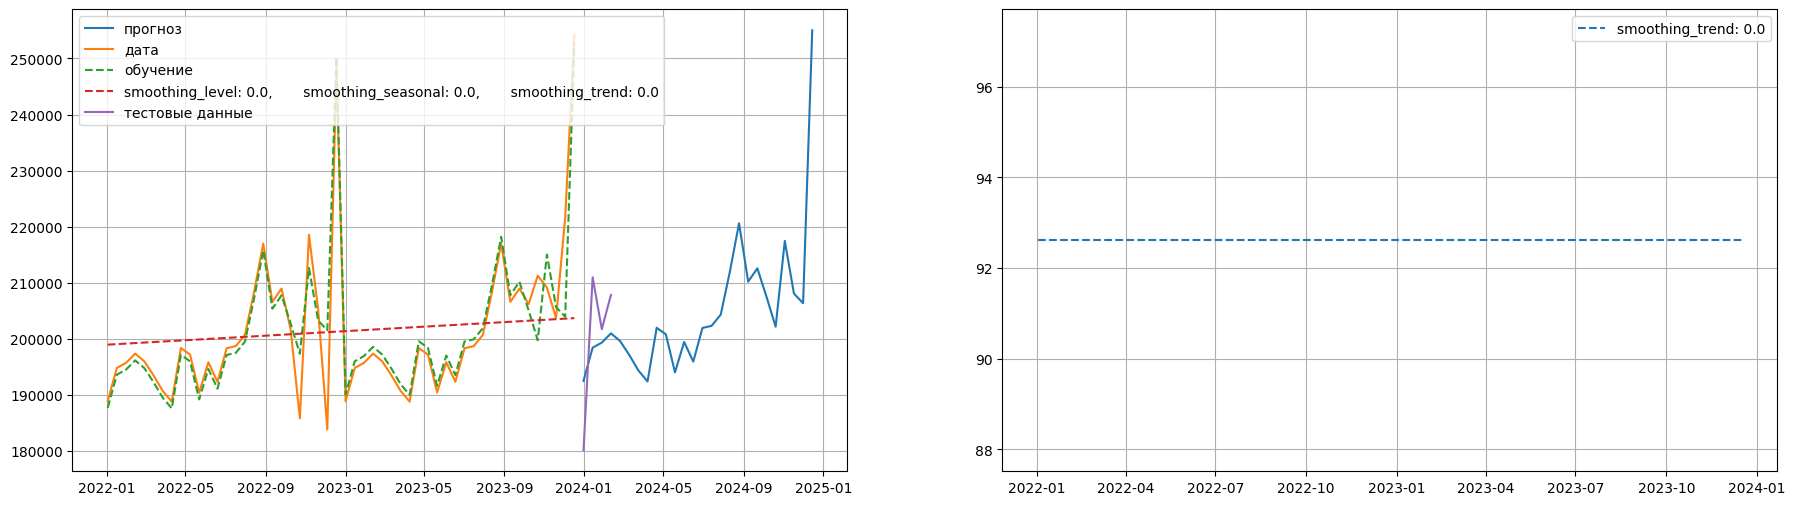

(0.0, 0.0, 0.1)


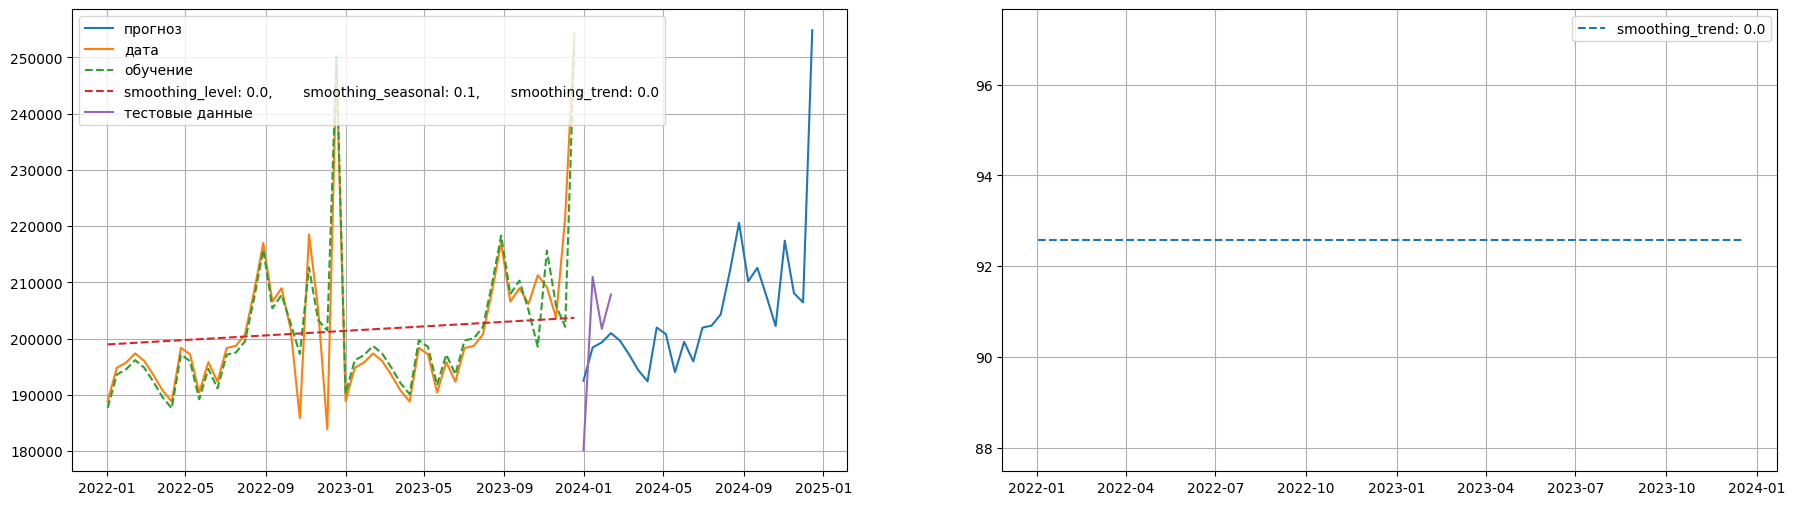

(0.0, 0.0, 0.2)


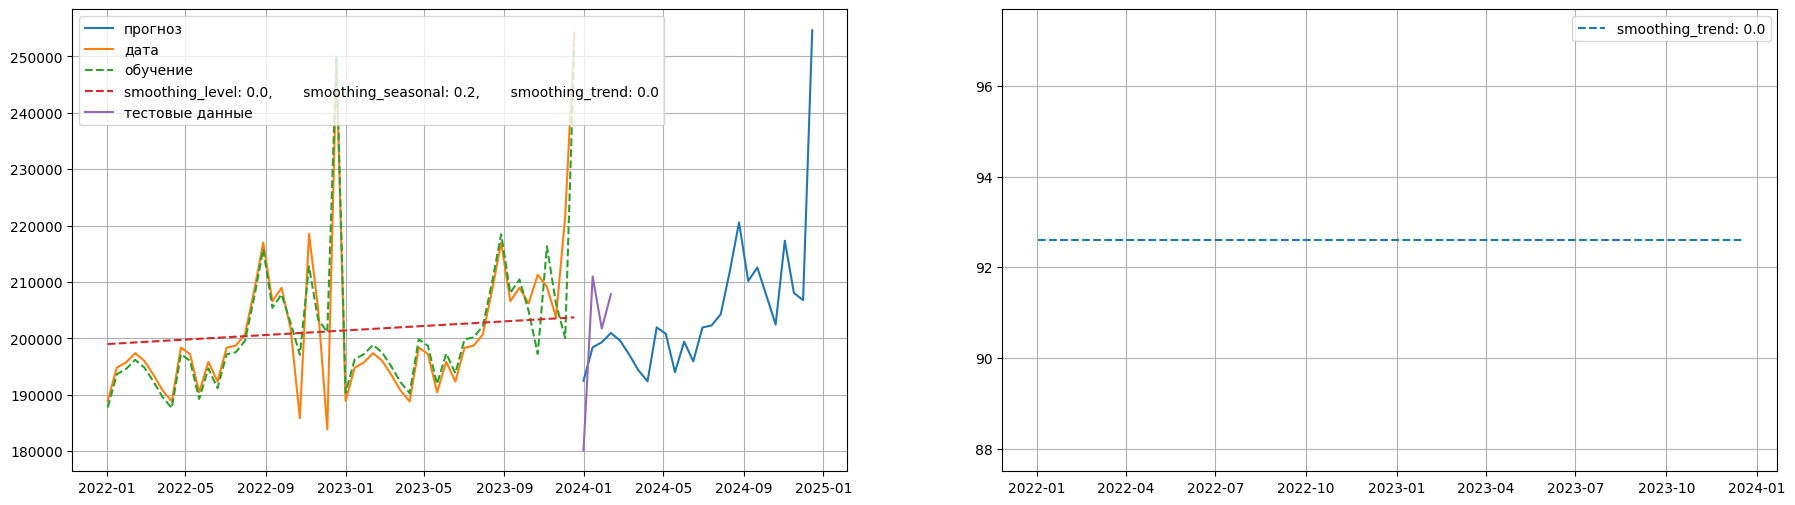

(0.0, 0.1, 0.0)


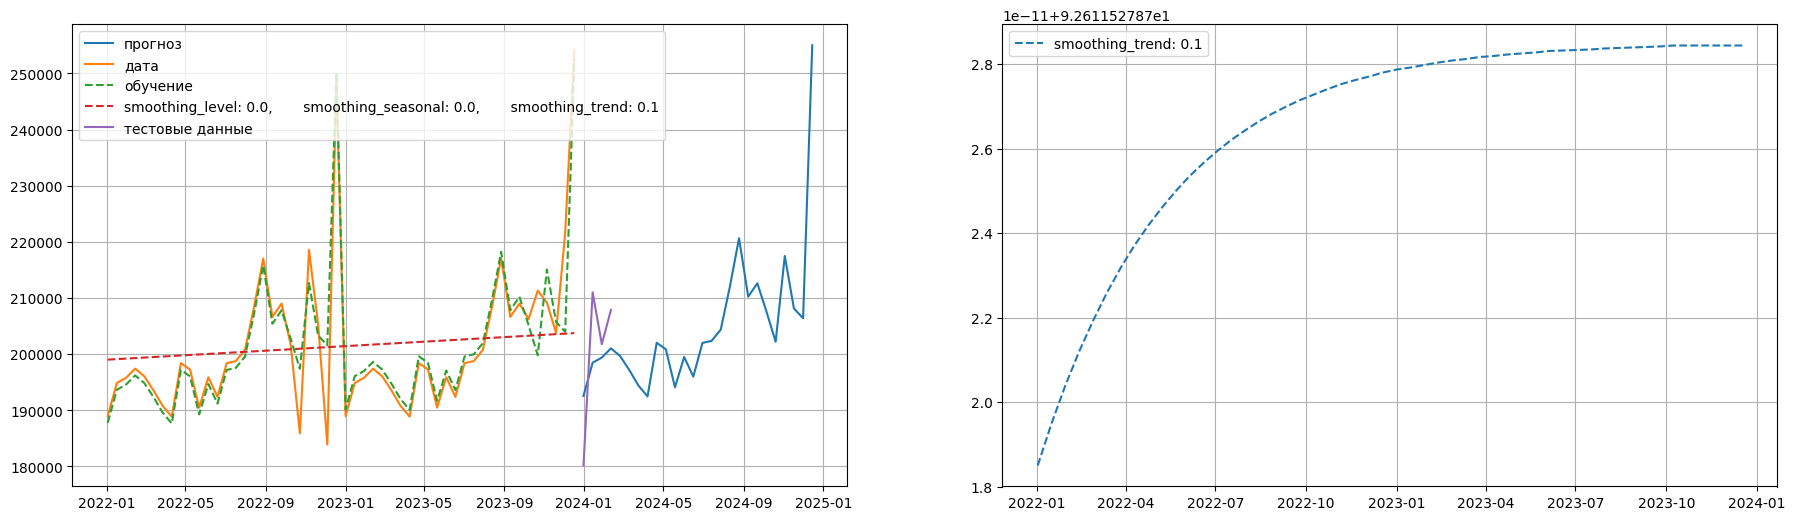

(0.0, 0.1, 0.1)


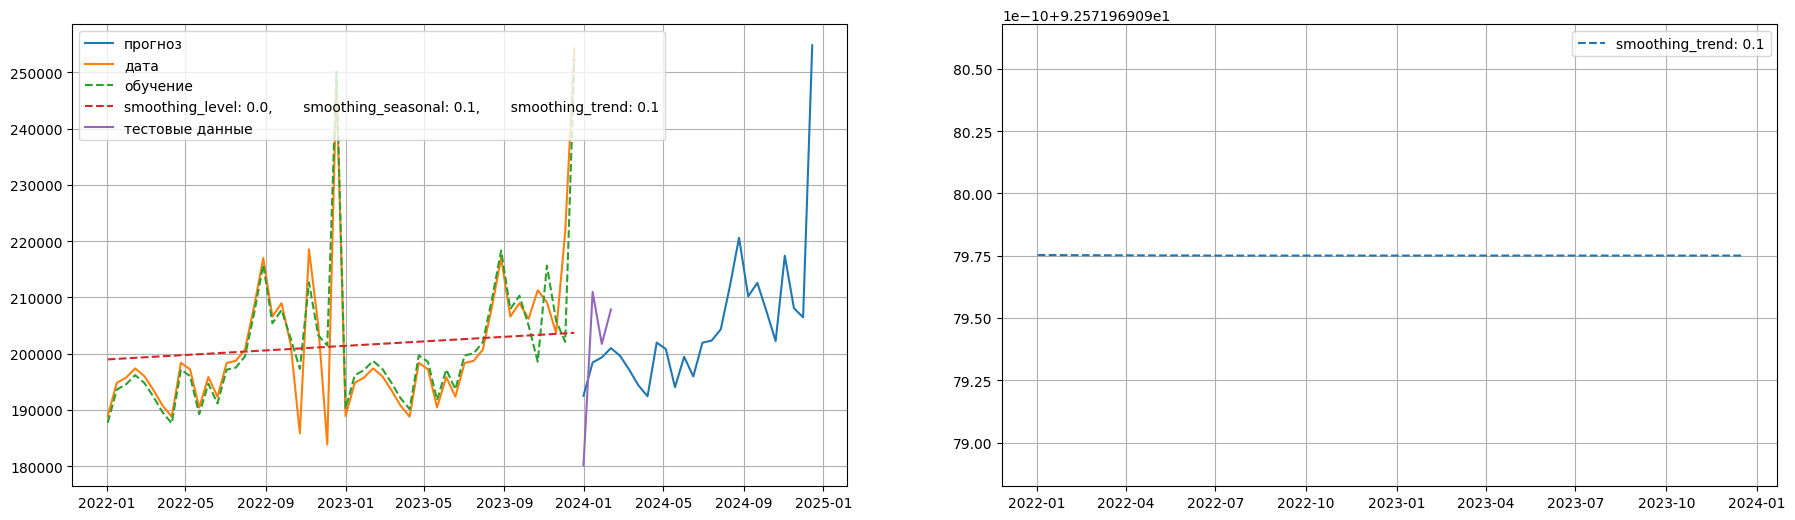

(0.0, 0.1, 0.2)


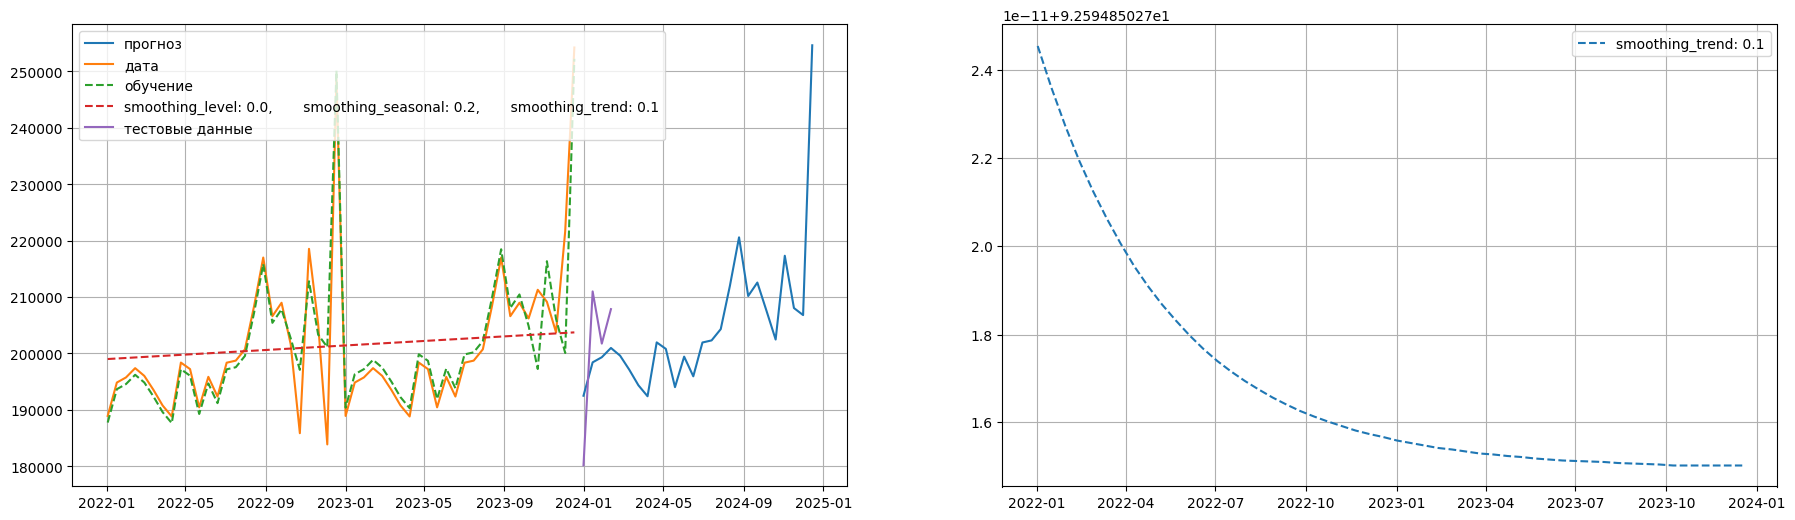

(0.0, 0.2, 0.0)


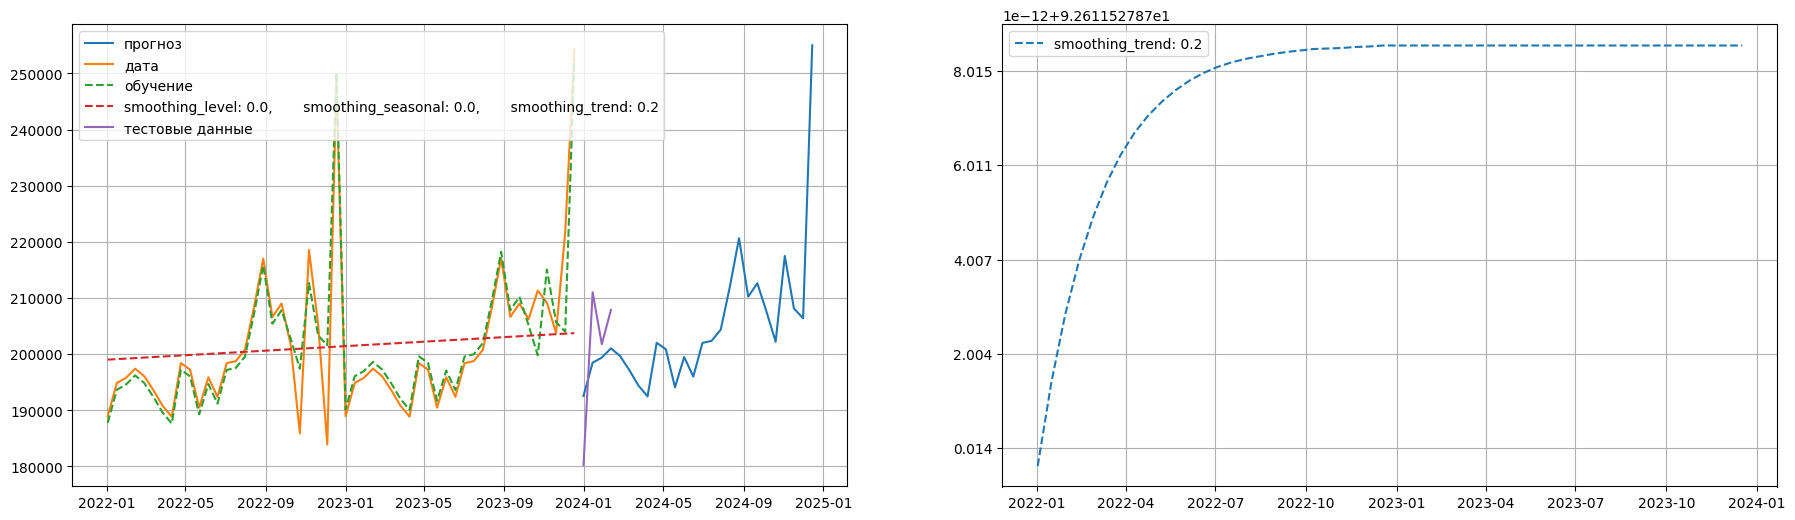

(0.0, 0.2, 0.1)


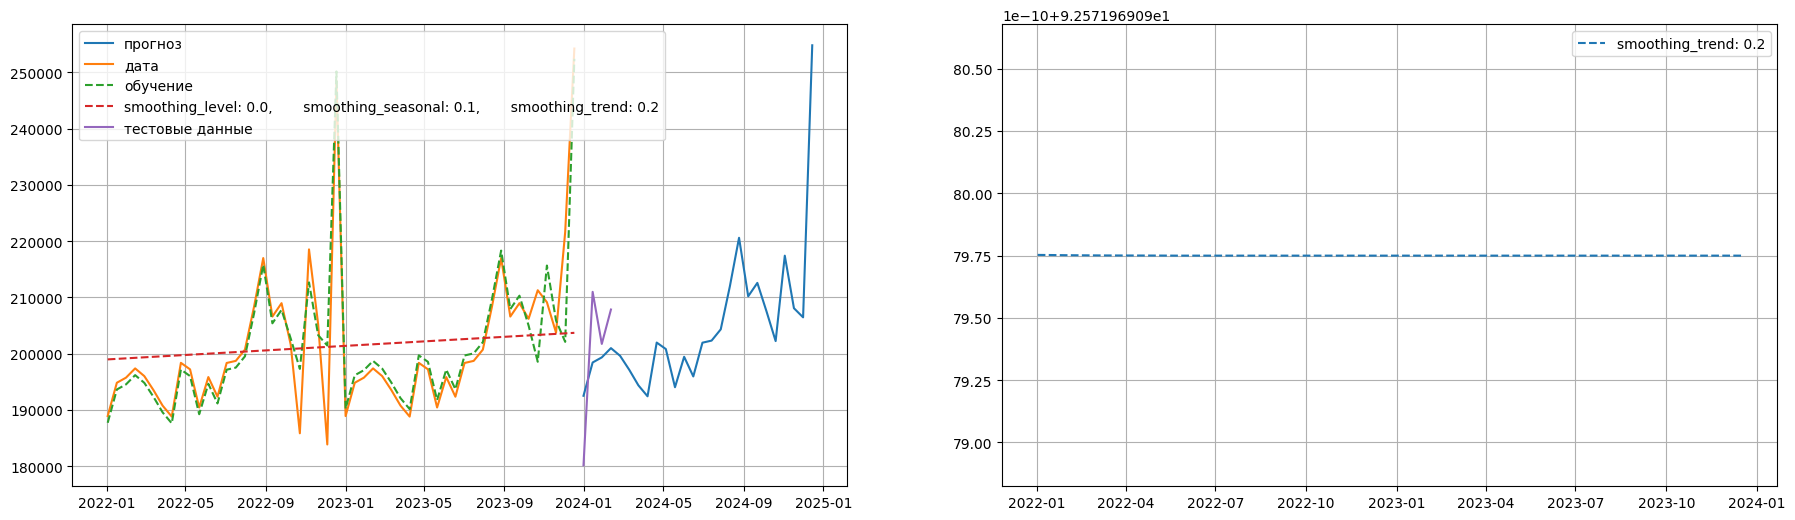

(0.0, 0.2, 0.2)


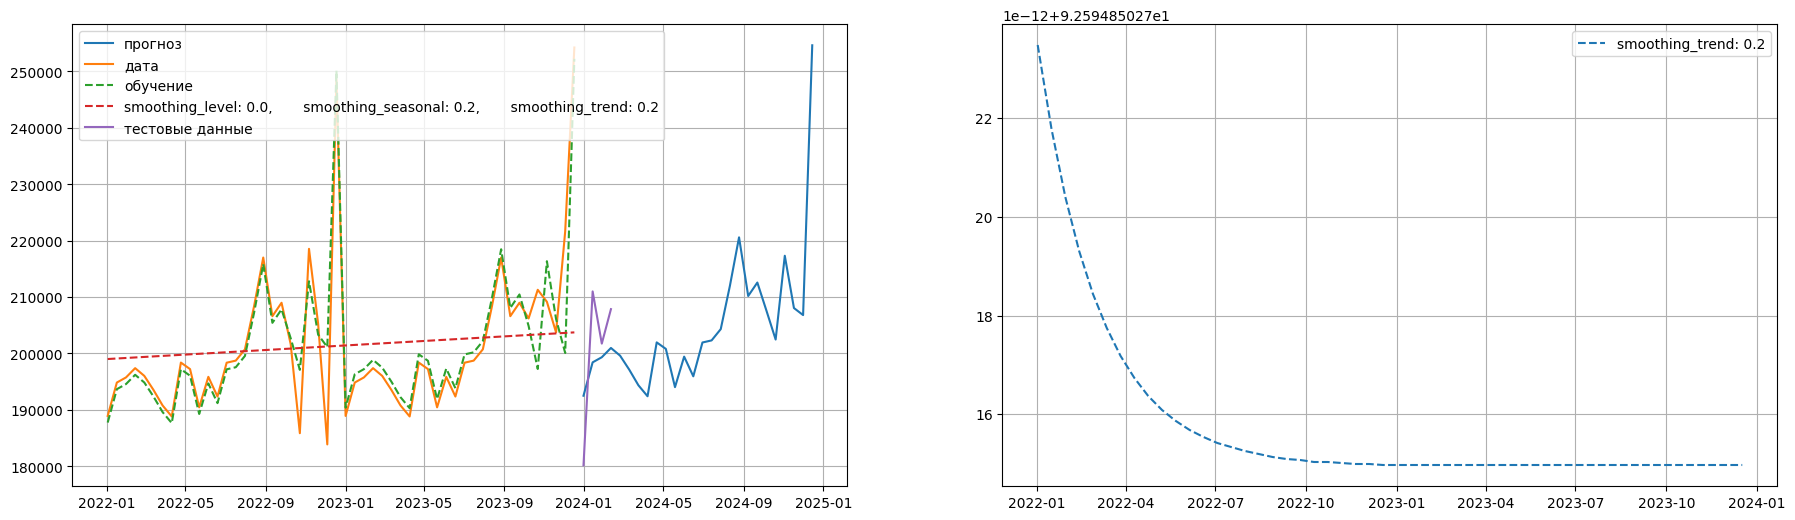

(0.1, 0.0, 0.0)


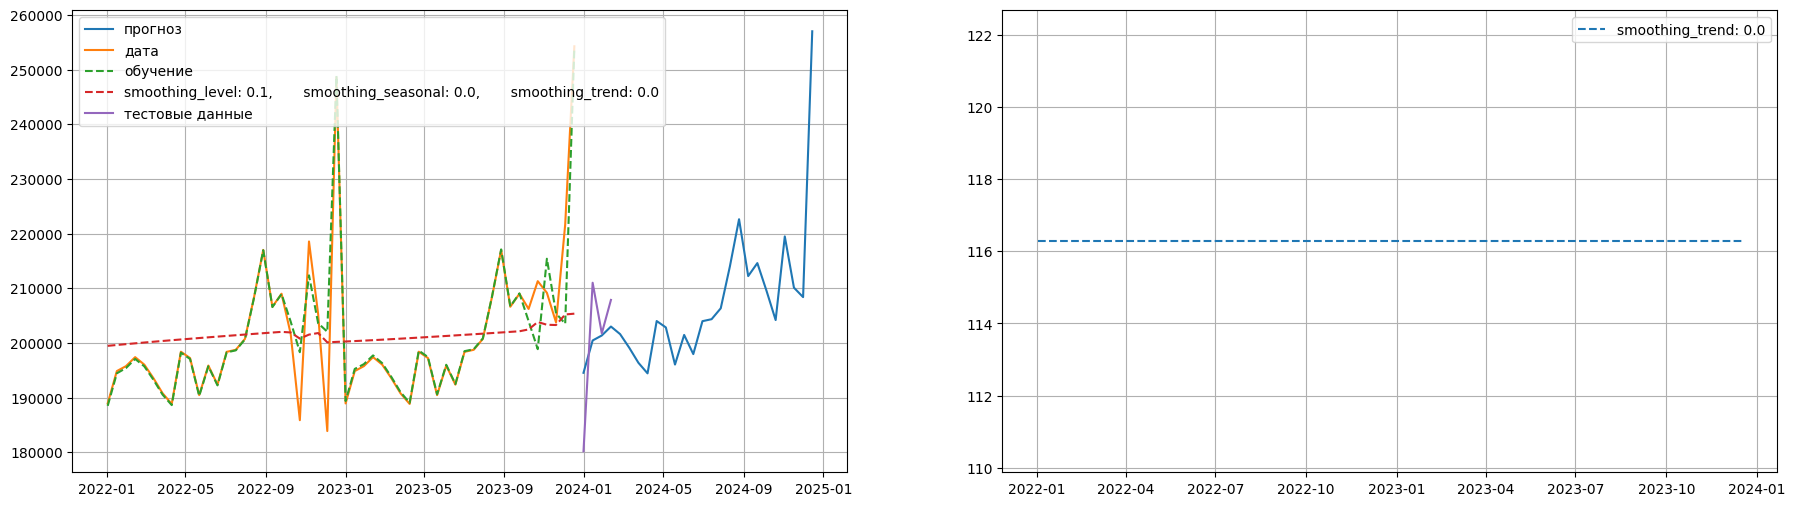

(0.1, 0.0, 0.1)


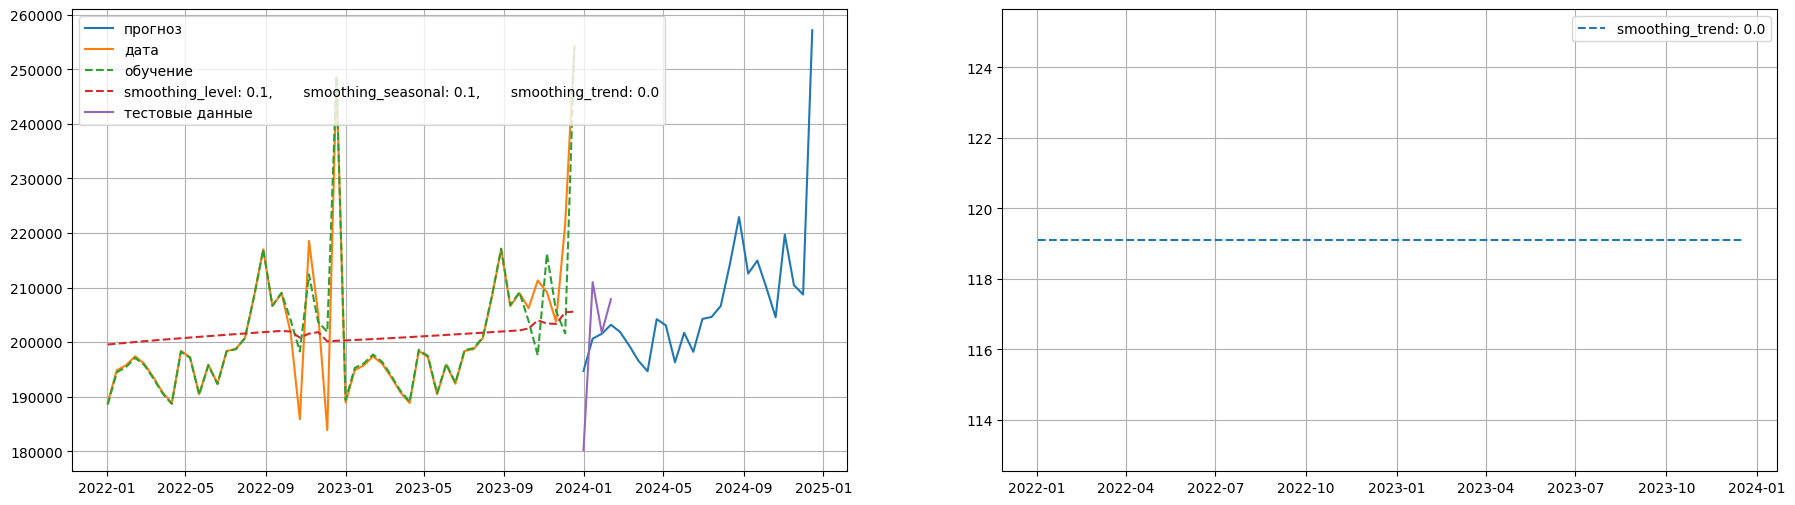

(0.1, 0.0, 0.2)


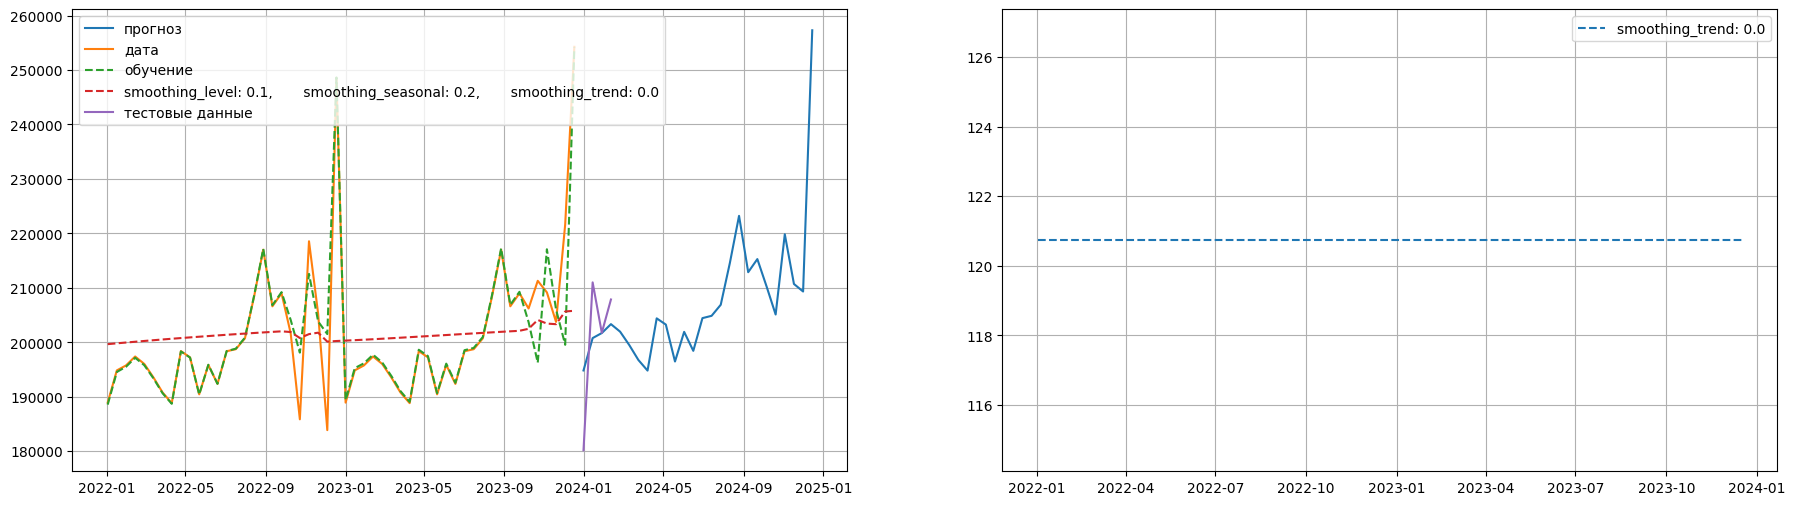

(0.1, 0.1, 0.0)


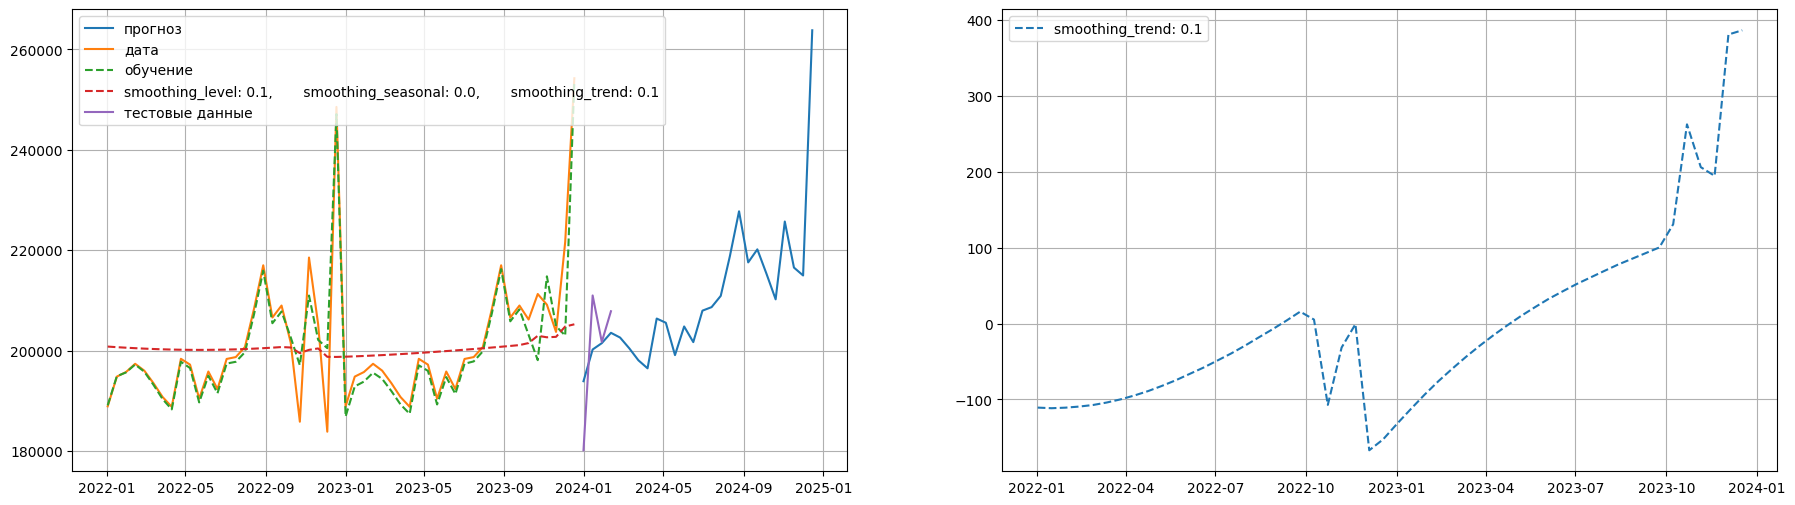

(0.1, 0.1, 0.1)


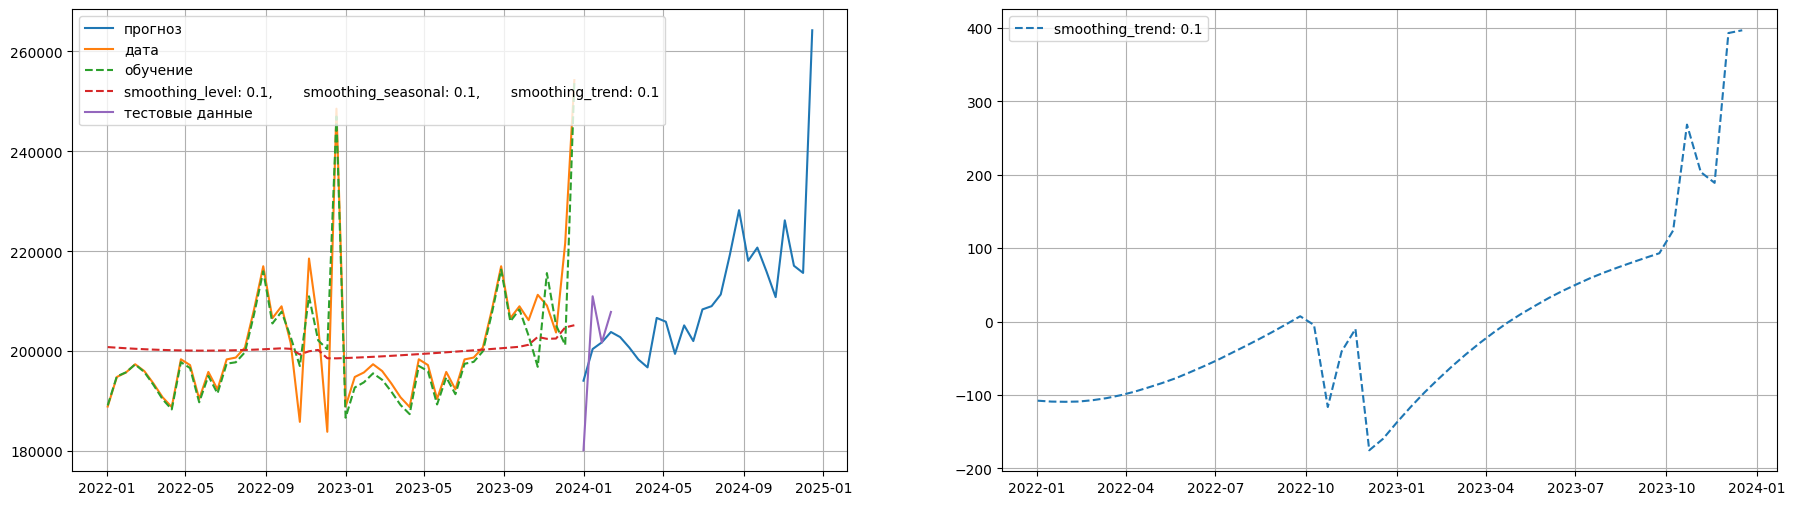

(0.1, 0.1, 0.2)


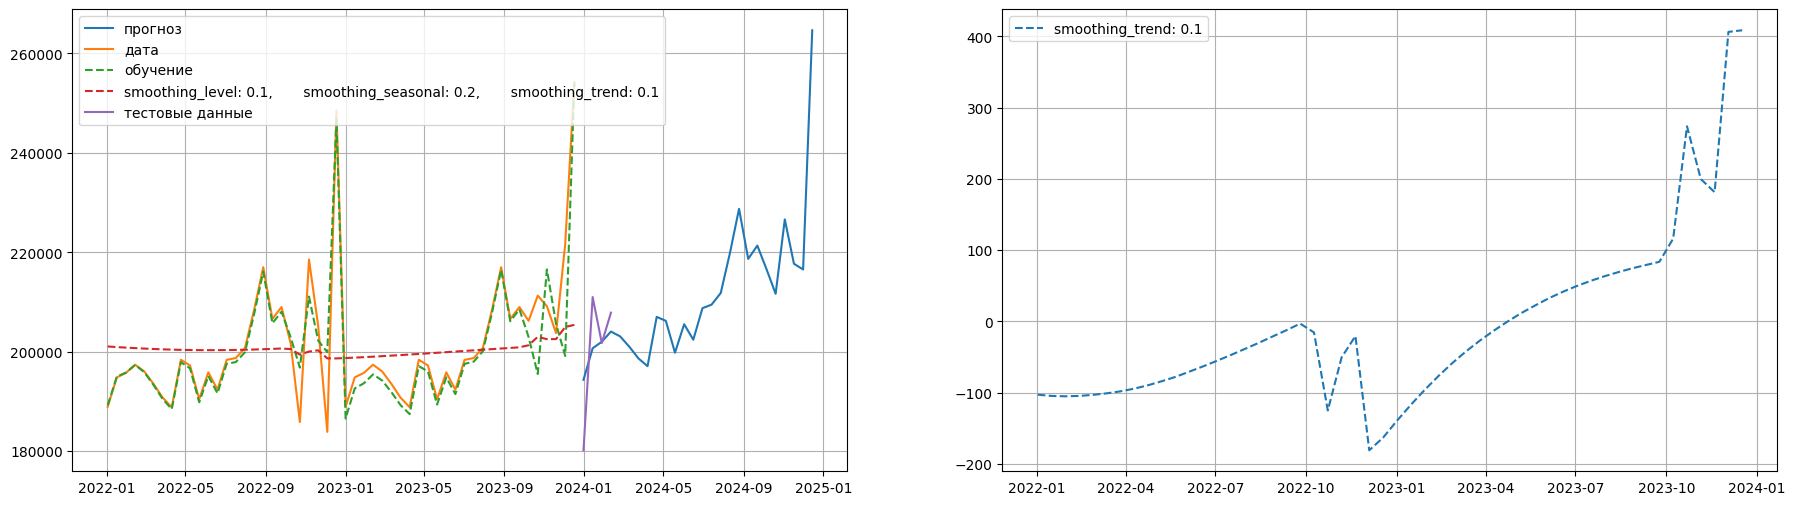

(0.1, 0.2, 0.0)


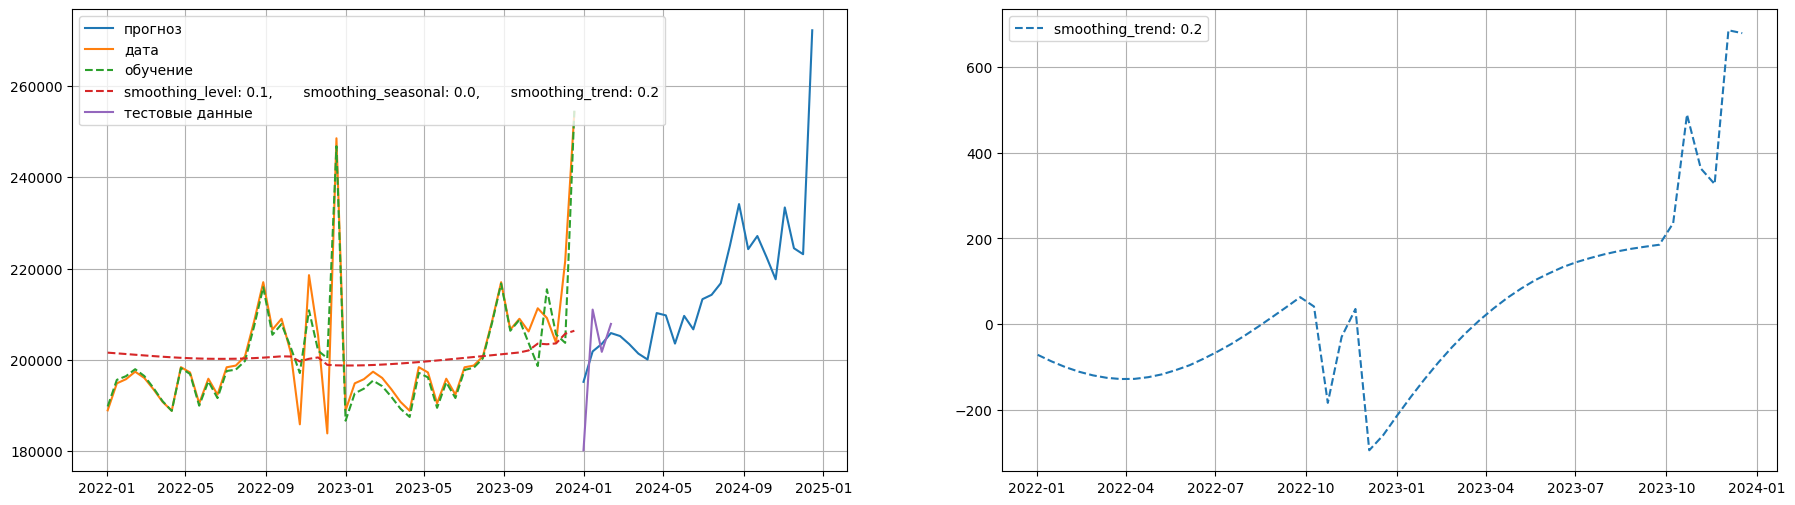

(0.1, 0.2, 0.1)


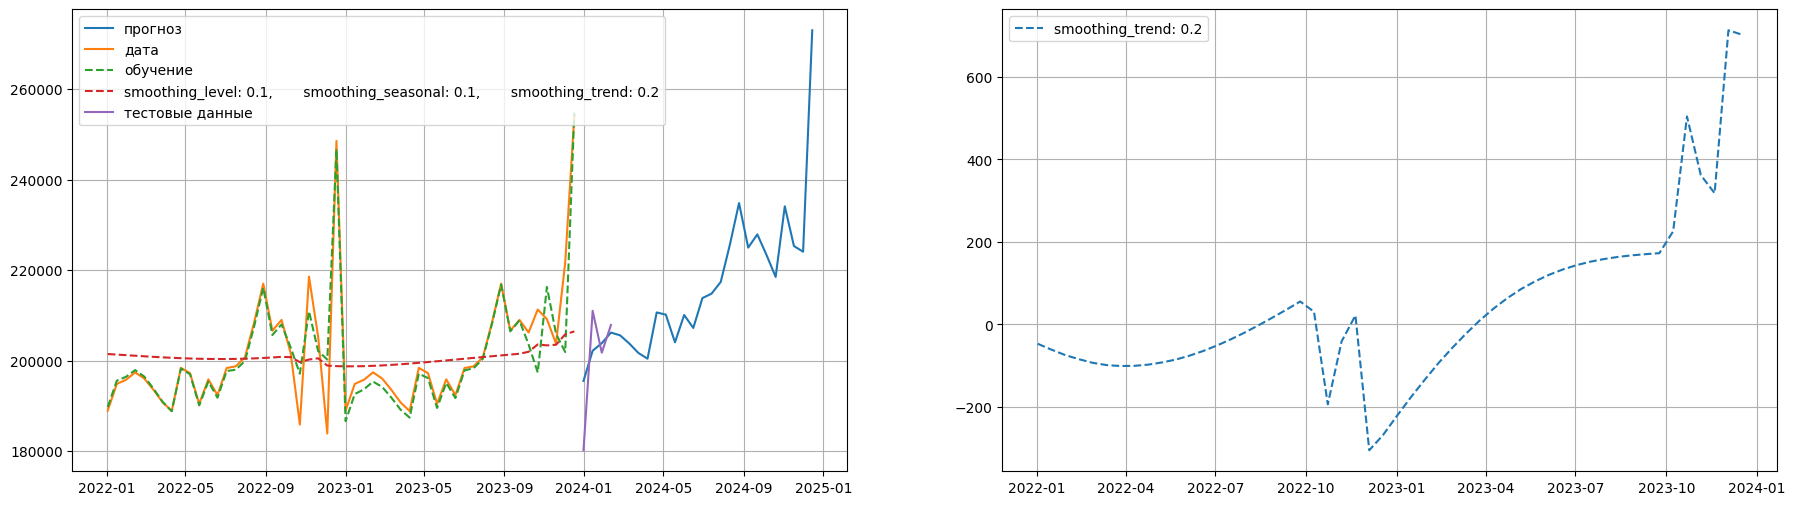

(0.1, 0.2, 0.2)


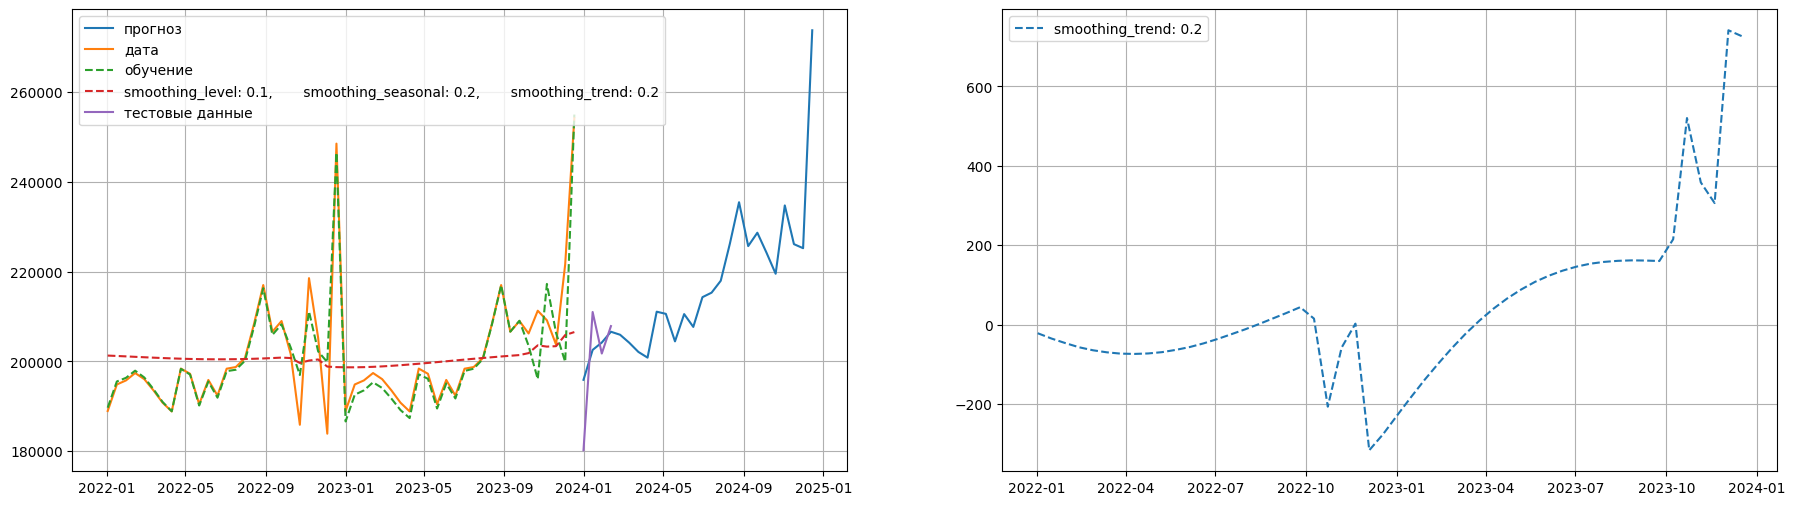

(0.2, 0.0, 0.0)


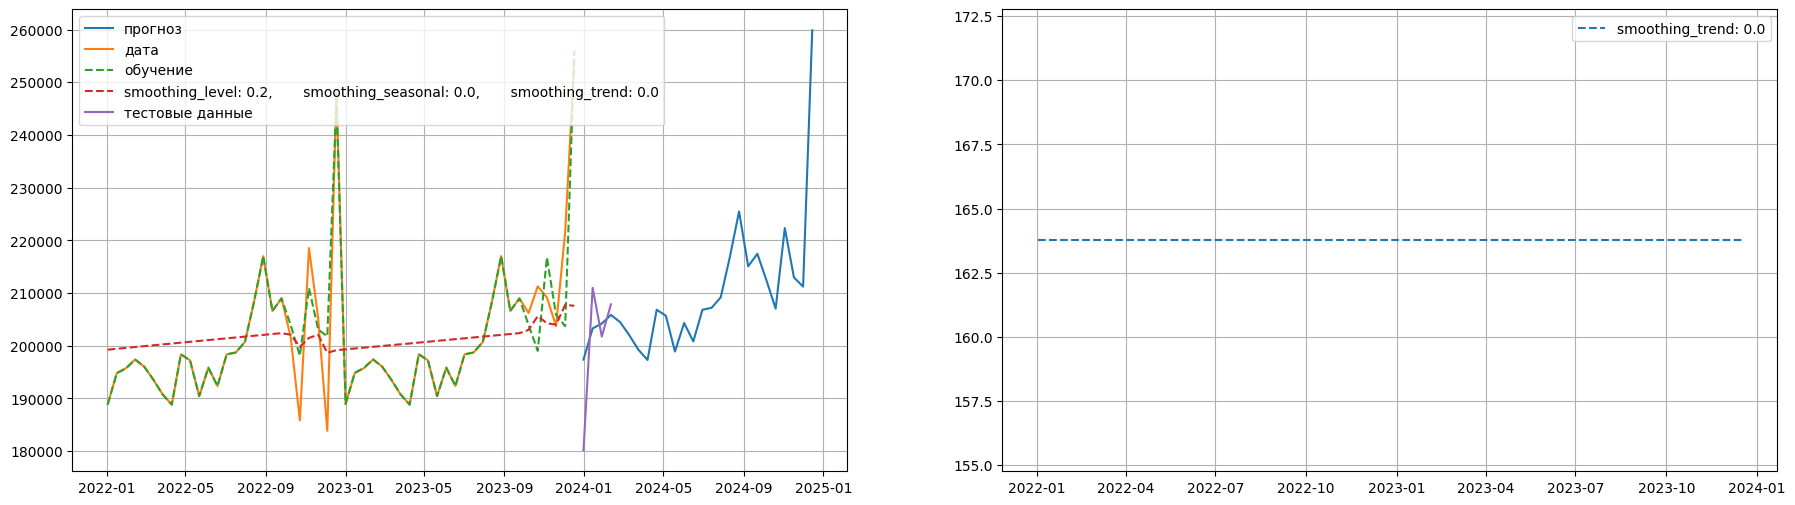

(0.2, 0.0, 0.1)


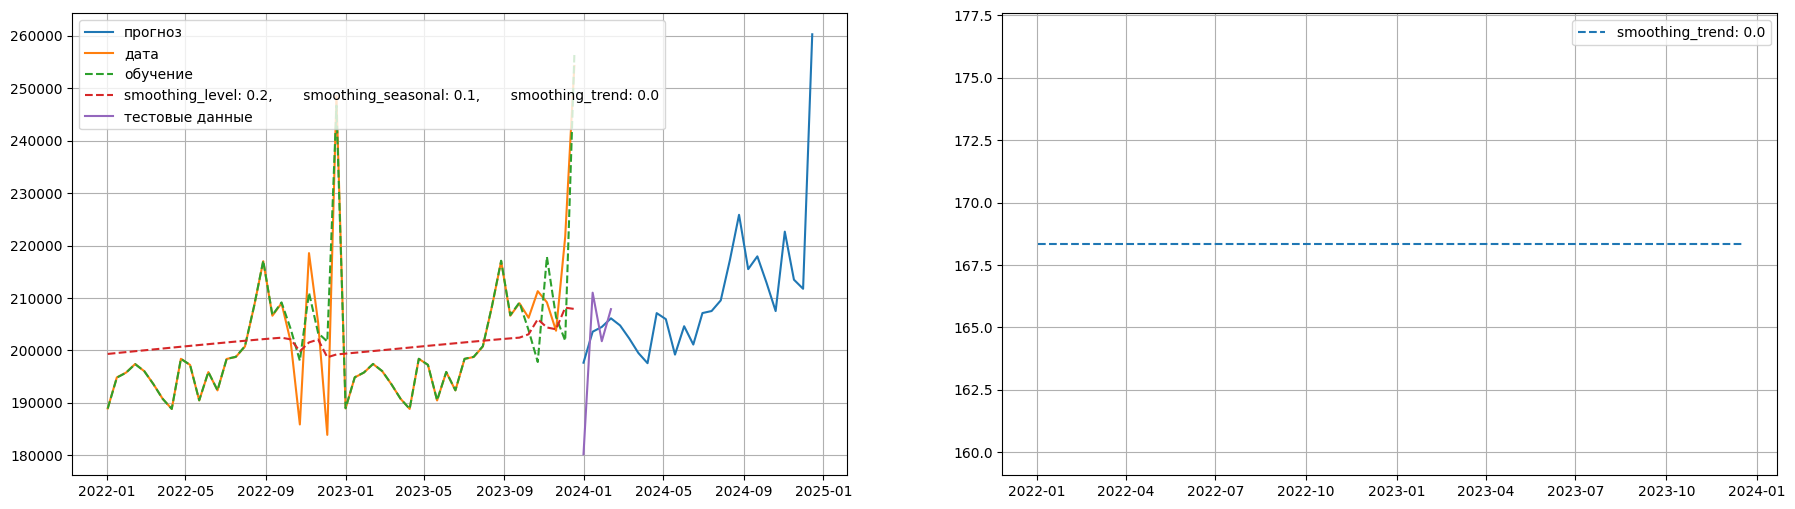

(0.2, 0.0, 0.2)


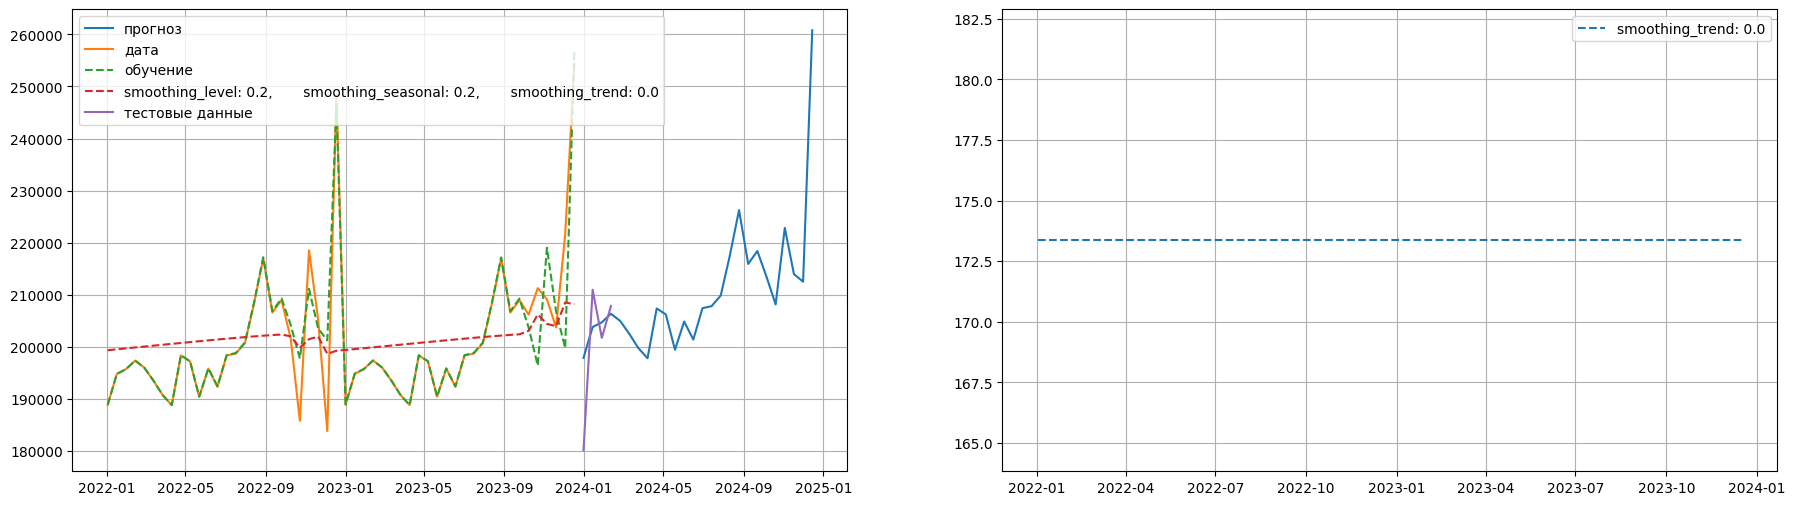

(0.2, 0.1, 0.0)


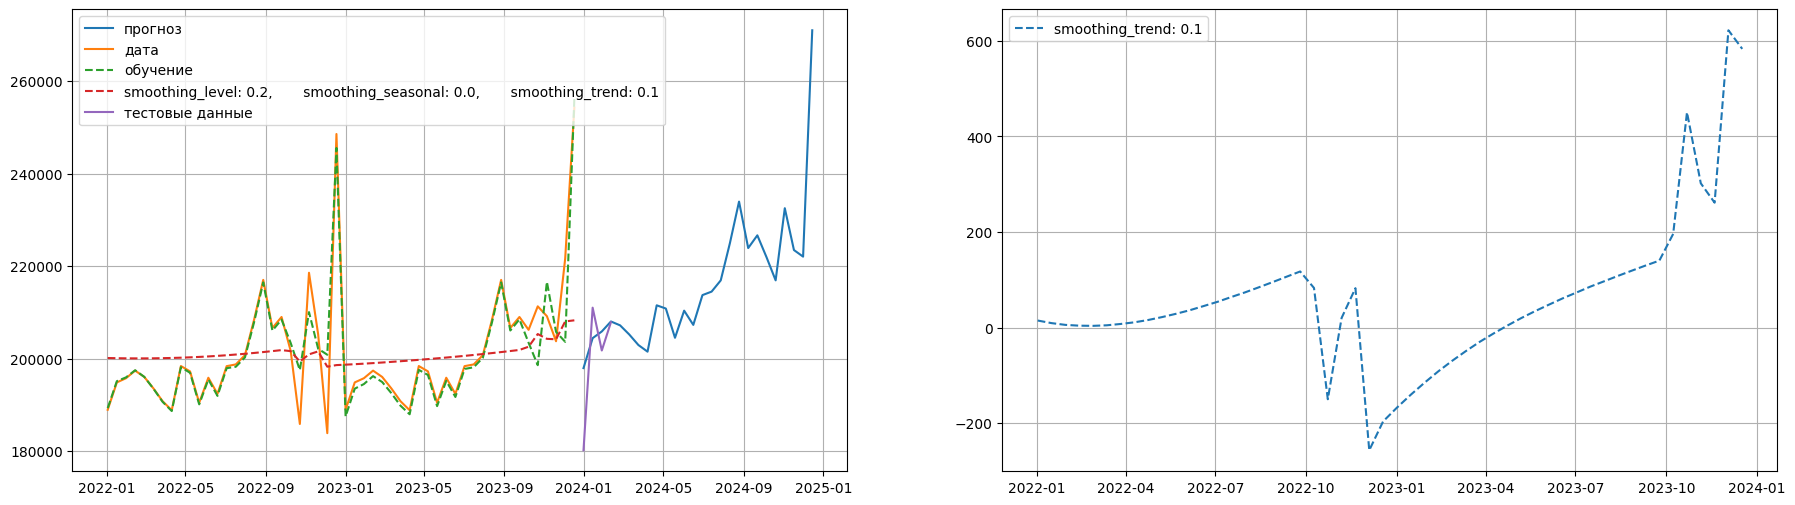

(0.2, 0.1, 0.1)


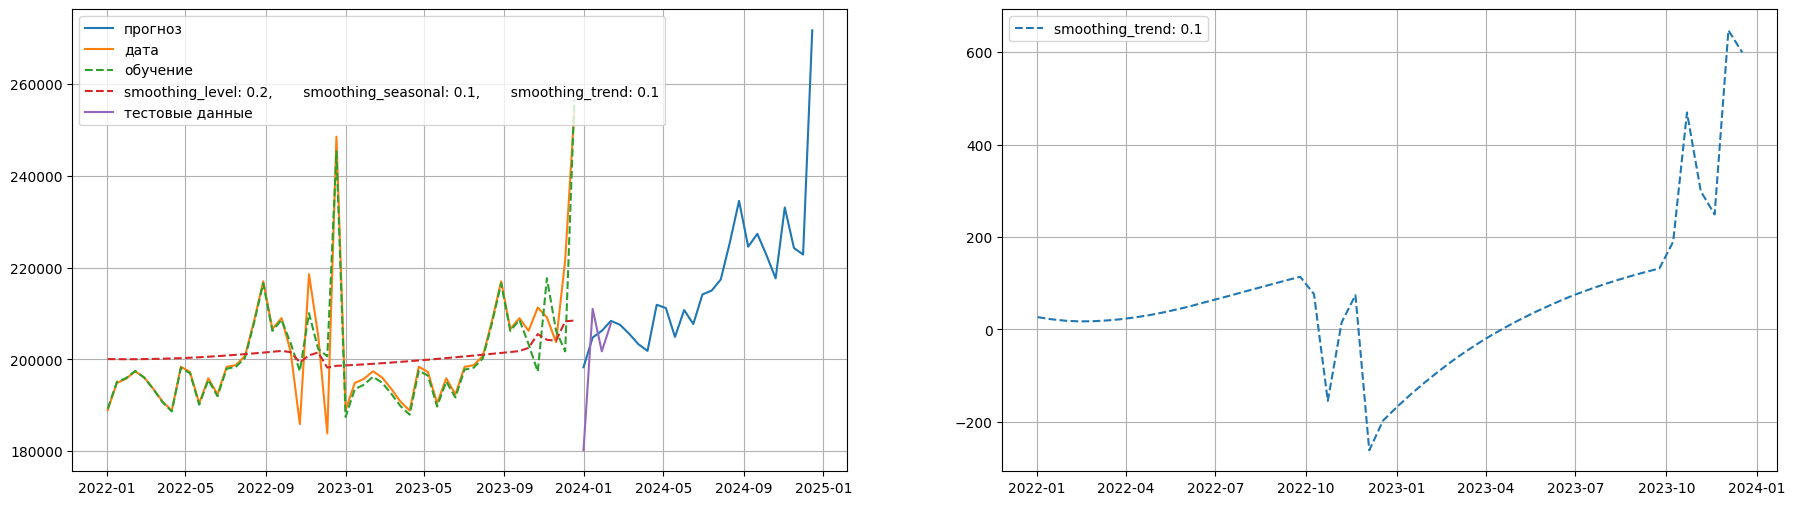

(0.2, 0.1, 0.2)


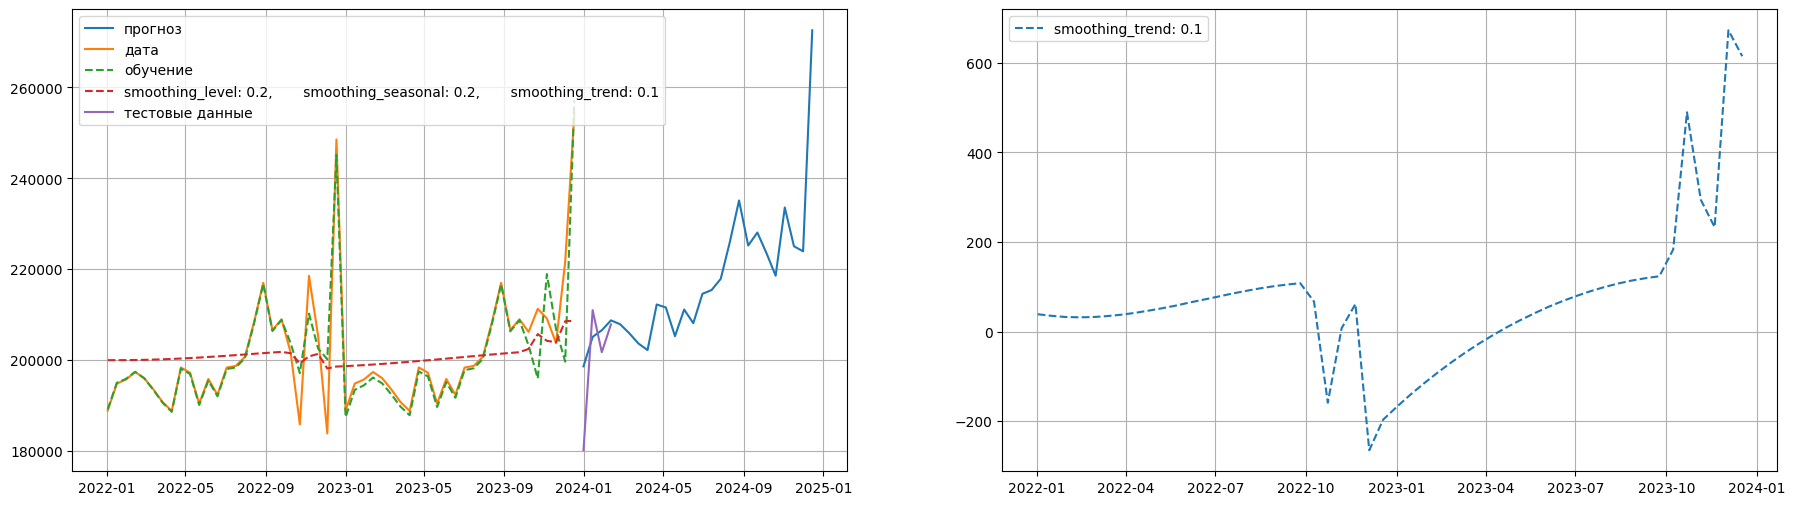

(0.2, 0.2, 0.0)


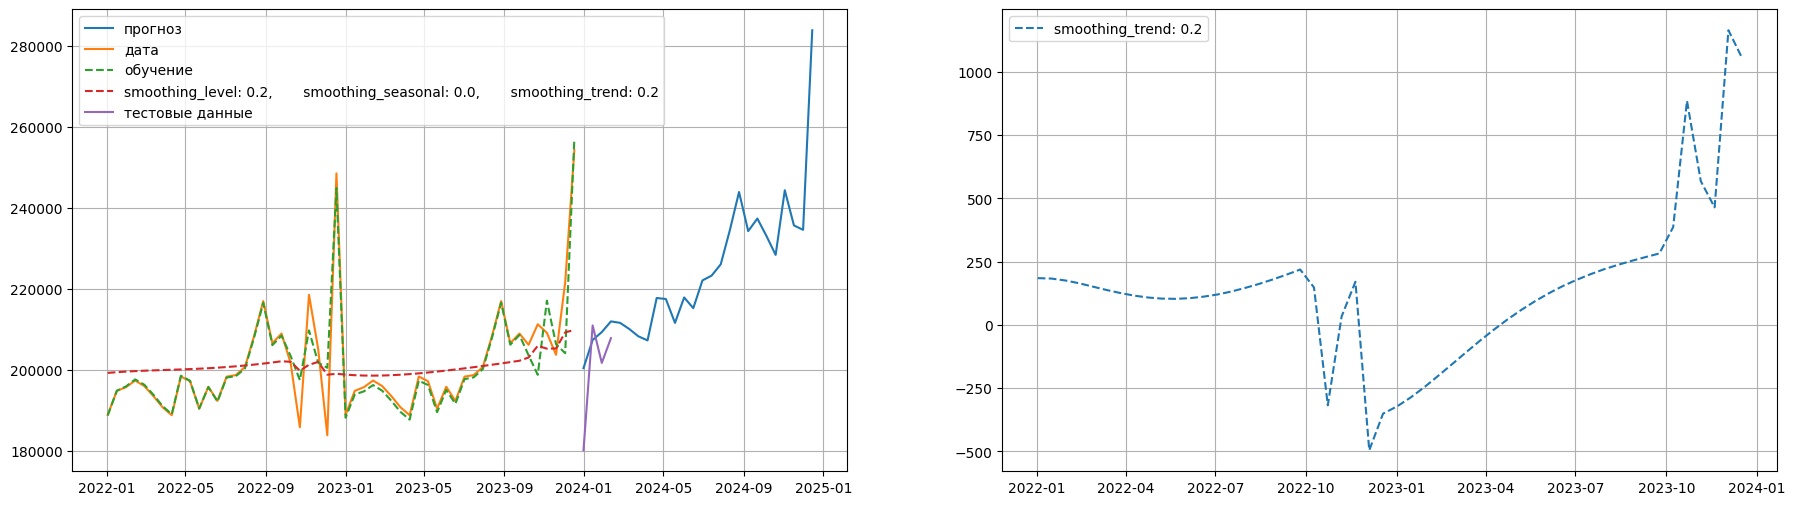

(0.2, 0.2, 0.1)


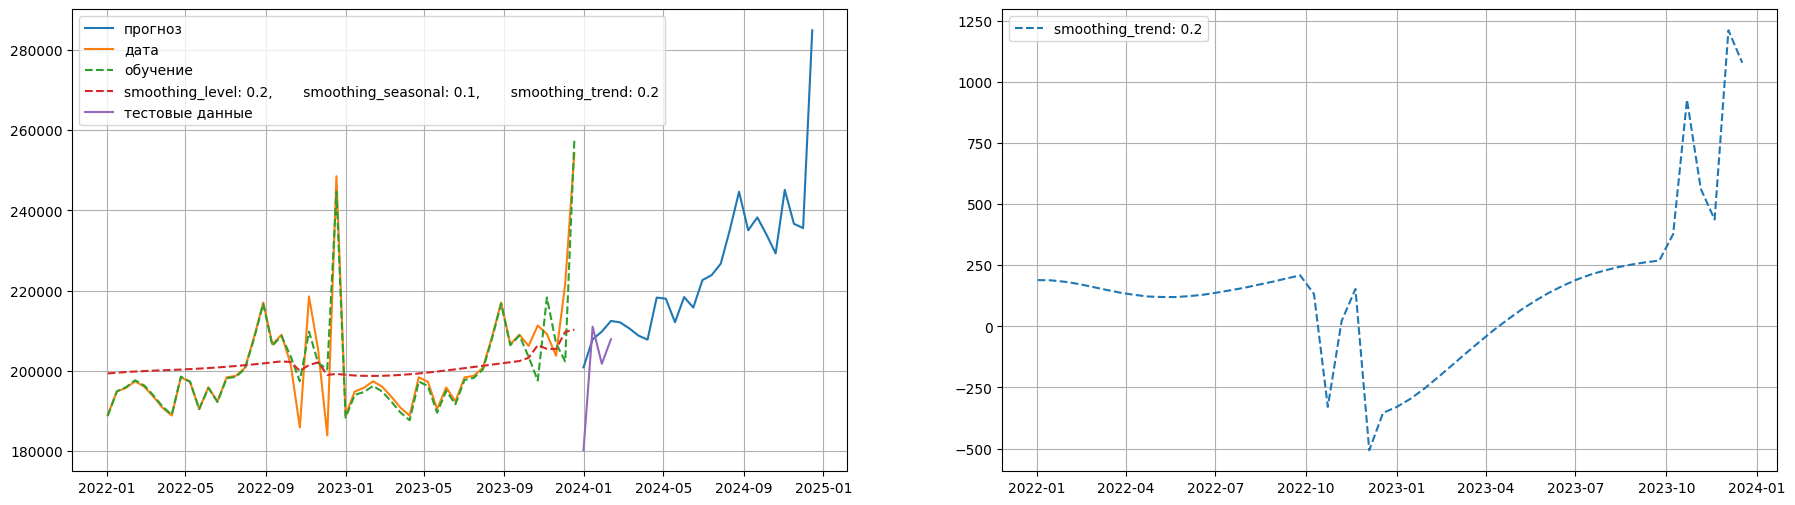

(0.2, 0.2, 0.2)


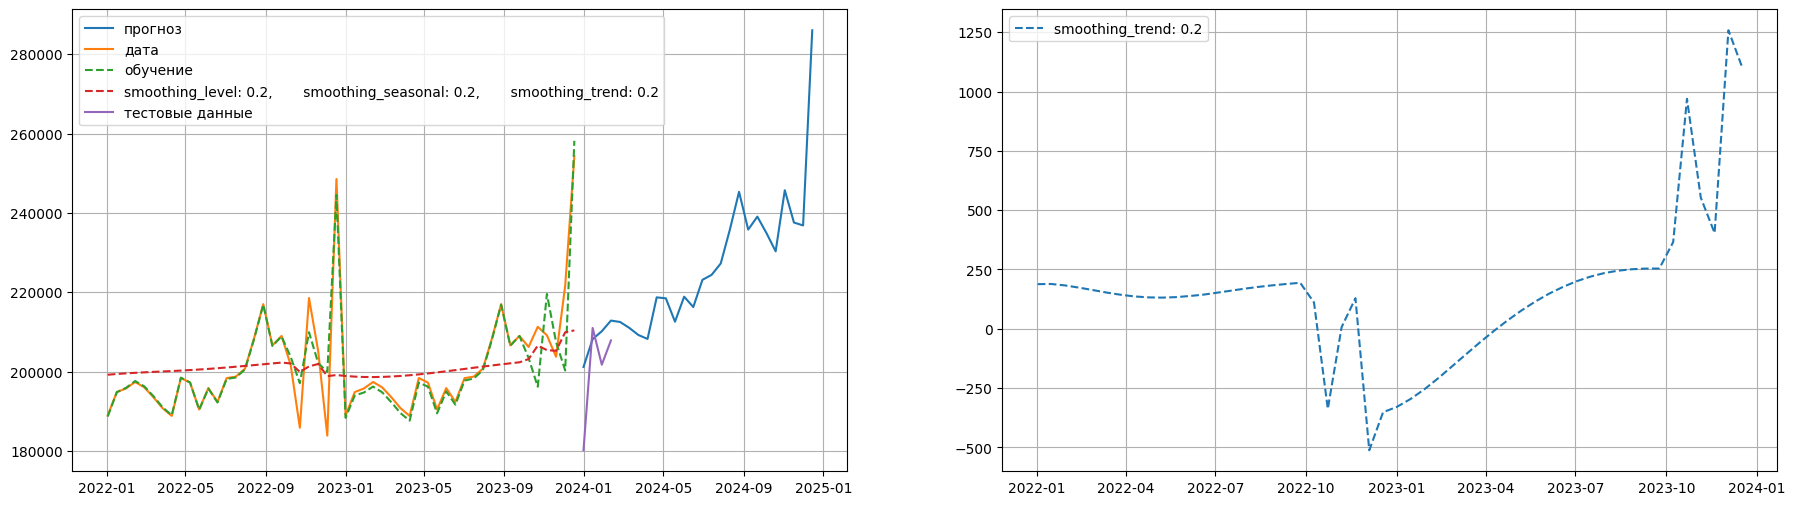

In [23]:
for l in np.arange(0, 0.3, 0.1):
  for t in np.arange(0, 0.3, 0.1):
    for s in np.arange(0, 0.3, 0.1):
      print((l,t,s))

      additive_model_concat = ExponentialSmoothing(
              concat_df_new,
              trend="add",
              seasonal='add',
              seasonal_periods=26,  # 26 len(concat_df_new,)//2

              # damped_trend=True,
              initialization_method='estimated',

              dates=concat_df_new.index).fit(
                                            smoothing_level=l,
                                            smoothing_trend=t,
                                            smoothing_seasonal=s)
                                            #  damping_trend=0)

      additive_forecast_concat = additive_model_concat.forecast(26)


      # Создаем фигуру с двумя субплотами, расположенными в одну строку
      fig, ax = plt.subplots(1, 2, figsize=(22, 6))

      # Первый график
      ax[0].plot(additive_forecast_concat, label='прогноз')
      ax[0].plot(concat_df_new, label='дата')
      ax[0].plot(additive_model_concat.fittedvalues, label='обучение', linestyle='--')
      ax[0].plot(additive_model_concat.level, label=f'smoothing_level: {additive_model_concat.params["smoothing_level"]}, \
      smoothing_seasonal: {additive_model_concat.params["smoothing_seasonal"]}, \
      smoothing_trend: {additive_model_concat.params["smoothing_trend"]}', linestyle='--')
      ax[0].plot(series_data_org[end_train:], label='тестовые данные')
      ax[0].legend()
      ax[0].grid(True)

      # Второй график
      vc = pd.Series([0 for i in range(26)], index=additive_forecast_concat.index)
      trend_val = pd.concat([additive_model_concat.trend, vc])
      seas_val = pd.concat([additive_model_concat.season, vc])

      ax[1].plot(additive_model_concat.trend, label=f'smoothing_trend: {additive_model_concat.params["smoothing_trend"]}', linestyle='--')
      # ax[1].plot(trend_val, label=f'smoothing_trend: {additive_model_concat.params["smoothing_trend"]}', linestyle='--')
      # ax[1].plot(seas_val, label=f'smoothing_seasonal: {additive_model_concat.params["smoothing_seasonal"]}', linestyle='--')
      ax[1].grid(True)
      ax[1].legend()

      # Отображаем графики
      plt.show()


In [6]:
series_data_org[end_train:]

2023-12-31    180171.795
2024-01-14    210998.795
2024-01-28    201742.995
2024-02-11    207858.255
Freq: 2W-SUN, Name: SALES VOL, dtype: float64

In [7]:
import pandas as pd

# Создание test_data
test_data = pd.Series(
    data=[180171.795, 210998.795, 201742.995, 207858.255],
    index=pd.date_range(start='2023-12-31', periods=4, freq='2W-SUN'),
    name='SALES VOL'
)

# Вывод test_data для проверки
print(test_data)


2023-12-31    180171.795
2024-01-14    210998.795
2024-01-28    201742.995
2024-02-11    207858.255
Freq: 2W-SUN, Name: SALES VOL, dtype: float64


In [20]:
pred_data = concat_df_new[:4]
pred_data.index = test_data.index
data_roll = pd.concat([concat_df_new[4:],pred_data])


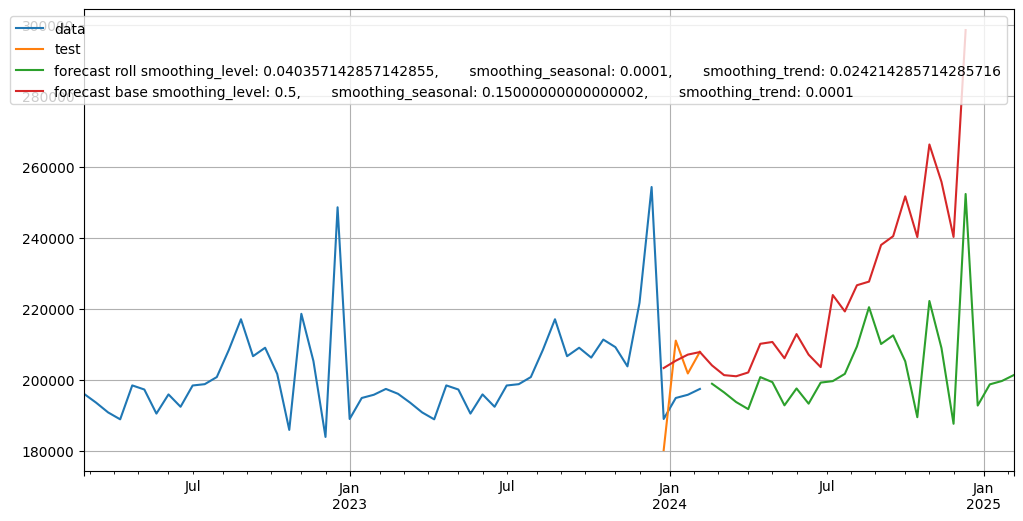

In [84]:
bounds = {
    'smoothing_level': (0.01, 0.1),
    'smoothing_trend': (0.001, 0.01),
    'smoothing_seasonal': (0.1, 0.5)
}

minimize_kwargs = {
    'options': {
        'disp': True,    # Выводить информацию о ходе оптимизации
        'maxiter': 10,  # Максимальное количество итераций
        'eps': 1     # Шаг для численного дифференцирования
    }
}
additive_model_roll = ExponentialSmoothing(
          data_roll,
          trend="add",
          seasonal='add',
          seasonal_periods=26,  # 26 len(concat_df_new,)//2

          # damped_trend=True,
          # use_boxcox=0.5,
          initialization_method='estimated',

          dates=data_roll.index).fit()
                                        #  damping_trend=0)
additive_model_base = ExponentialSmoothing(
          series_data_org[:end_train],
          trend="add",
          seasonal='add',
          seasonal_periods=26,  # 26 len(concat_df_new,)//2

          # damped_trend=True,
          initialization_method='estimated',
          # bounds=bounds,
          # use_boxcox=True,


          dates=series_data_org[:end_train].index).fit()
                                        #  damping_trend=0)


additive_forecast_roll = additive_model_roll.forecast(26)
additive_forecast_base = additive_model_base.forecast(26)
data_roll.plot(label='data',figsize=(12,6))
series_data_org[end_train:].plot(label='test',figsize=(12,6))
additive_forecast_roll.plot(label=f'forecast roll smoothing_level: {additive_model_roll.params["smoothing_level"]}, \
      smoothing_seasonal: {additive_model_roll.params["smoothing_seasonal"]}, \
      smoothing_trend: {additive_model_roll.params["smoothing_trend"]}',figsize=(12,6))
additive_forecast_base.plot(label=f'forecast base smoothing_level: {additive_model_base.params["smoothing_level"]}, \
      smoothing_seasonal: {additive_model_base.params["smoothing_seasonal"]}, \
      smoothing_trend: {additive_model_base.params["smoothing_trend"]}',figsize=(12,6))
plt.legend()
plt.grid(True)
plt.show()


In [82]:
fit.summary()

Dep. Variable:,None,No. Observations:,24
Model:,ExponentialSmoothing,SSE,213.500
Optimized:,True,AIC,84.454
Trend:,Additive,BIC,103.303
Seasonal:,Additive,AICC,221.254
Seasonal Periods:,12,Date:,"Wed, 22 May 2024"
Box-Cox:,False,Time:,12:16:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True
